Investigating Fandango Movie Ratings
===

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

* The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
* For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

Undersanding The Data
---

For this project, we are going to use two datasets. One is made by Walt Hickey(fandango_score_comparison.csv). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis. The other one is from Dataquest's team members collected movie ratings data for movies released in 2016 and 2017(movie_ratings_16_17.csv). We'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_columns = 100

In [3]:
previous = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

In [4]:
previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [5]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [6]:
f_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

In [7]:
f_after= after[['movie', 'year', 'fandango']]

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

The sampling doesn't seem random because not every movie is included in the data, some movies didn't have a chance at all (like the ones that have less than 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population. It seems more likely that it isn't, because this sample might be subject to temporal trends. For instance, movies in 2015 might be better or  worse compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

**In conclusion, we are going to change the goal of our analysis.**

Our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

Isolating The Samples We Need
---

With the new goal, we now have two populations that we want to describe and compare with each other:

* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

First, we will check if both samples contain popular movies.

In [8]:
f_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [9]:
f_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The dataset "f_after" does not have information about if any movie has over 30 fan ratings.

In [10]:
(f_previous["Fandango_votes"] < 30).sum()

0

All of the movies in f_previous dataset are popular.

Let's create a random sample from f_after, to check if the movies are popular.

In [11]:
f_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:

|Movie|	Fan ratings|
|---|---|---|
|Mechanic: Resurrection	|2247|
|Warcraft	|7271|
|Max Steel	|493|
|Me Before You	|5263|
|Fantastic Beasts and Where to Find Them	|13400|
|Cell	|17|
|Genius	|127|
|Sully	|11877|
|A Hologram for the King	|500|
|Captain America: Civil War	|35057|

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

If we explore the data sets enough, we'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

In [12]:
f_previous["year"] = f_previous["FILM"].str[-5:-1]
f_previous["FILM"] = f_previous["FILM"].str[:-6]
f_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015


In [13]:
f_previous["year"].unique()

array(['2015', '2014'], dtype=object)

In [14]:
f_after["year"].unique()

array([2016, 2017])

In [15]:
f_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
year                    146 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 6.9+ KB


In [16]:
f_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [17]:
f_previous["year"] = f_previous["year"].astype(int)

In [18]:
f_previous15 = f_previous[f_previous["year"]==2015].copy()

In [19]:
f_after16 = f_after[f_after["year"]==2016].copy()

In [22]:
f_previous15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015


In [23]:
f_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Comparing Distribution Shapes for 2015 and 2016
---

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from numpy import arange

We will generate two kernel density plots on the same figure for the distribution of movie ratings of each sample so that we can compare between the shapes of the distributions of movie ratings for both samples.

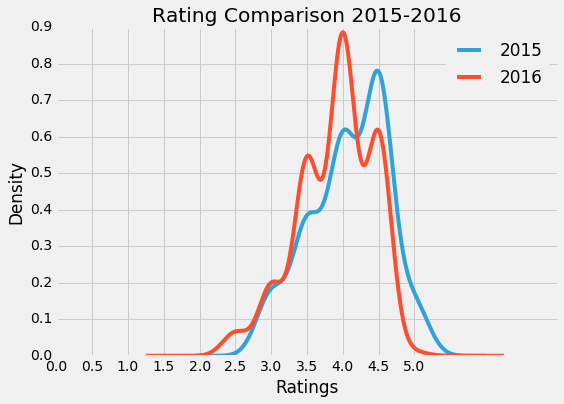

In [42]:
f_previous15["Fandango_Stars"].plot.kde(label ="2015", legend=True, figsize=(8,5.5))
f_after["fandango"].plot.kde(label ="2016", legend=True)
plt.title("Rating Comparison 2015-2016")
plt.xlabel("Ratings")
plt.xlim=(0,5)
plt.xticks(arange(0,5.1,.5))
plt.legend()
plt.show()

It looks like the density of ratings in 2016 are lower than 2015. In 2015 the most frequent star rating was 4.5 whereas in 2016 it's 4.0 with a much higher frequency. The shapes peak at 3.5, 4.0 and 4.5 in 2016 whereas it only peaks at 4.5 in 2015, we can also see a relatively small peak at 4.0. We can see that there is a change in between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 2016 star ratings are lower than 2015.

Both distributions are skewed left.

Comparing Relative Frequencies
---

Let's look at the frequencies of star ratings for 2015 and 2016.

In [43]:
f_previous15["Fandango_Stars"].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [49]:
(f_previous15["Fandango_Stars"].value_counts(normalize=True).sort_index()*100).round(2)

3.0     8.53
3.5    17.83
4.0    28.68
4.5    37.98
5.0     6.98
Name: Fandango_Stars, dtype: float64

In [44]:
f_after16["fandango"].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

In [50]:
(f_after16["fandango"].value_counts(normalize=True).sort_index()*100).round(2)

2.5     3.14
3.0     7.33
3.5    24.08
4.0    40.31
4.5    24.61
5.0     0.52
Name: fandango, dtype: float64

In [51]:
f_previous15.shape[0]

129

In [46]:
f_after16.shape[0]

191

It looks like we have more movies in 2016 dataset. As we can see the percentages of ratings are different in 2016 than 2015. 2016 has more lower rate of stars.

Determining the Direction of the Change
---

Next, we will compute the mean, the median, and the mode for both distributions and then use a bar graph to compare each values visiually.

In [58]:
mean15 = f_previous15["Fandango_Stars"].mean()
median15 = f_previous15["Fandango_Stars"].median()
mode15 = f_previous15["Fandango_Stars"].mode()[0]

mean16 = f_after["fandango"].mean()
median16 = f_after["fandango"].median()
mode16 = f_after["fandango"].mode()[0]

In [59]:
stats = pd.DataFrame()
stats["2015"] = [mean15, median15, mode15]
stats["2016"] = [mean16, median16, mode16]

In [61]:
stats.index = ["mean","median","mode"]

In [62]:
stats

,2015,2016
mean,4.085271,3.89486
median,4.000000,4.00000
mode,4.500000,4.00000


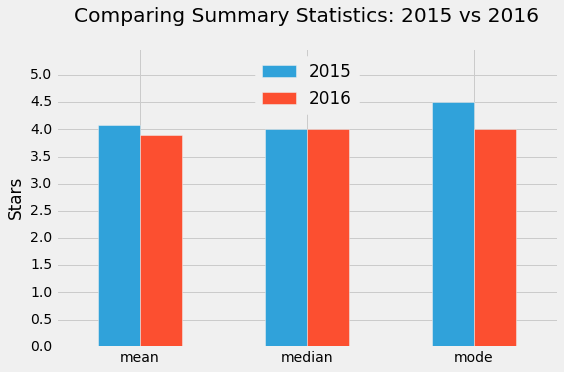

In [80]:
stats.plot.bar(figsize=(8,5), rot=0)
plt.title("Comparing Summary Statistics: 2015 vs 2016", y=1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,0.5))
plt.legend(loc="upper center")
plt.ylabel("Stars")
plt.show()

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

Conclusion
---

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.